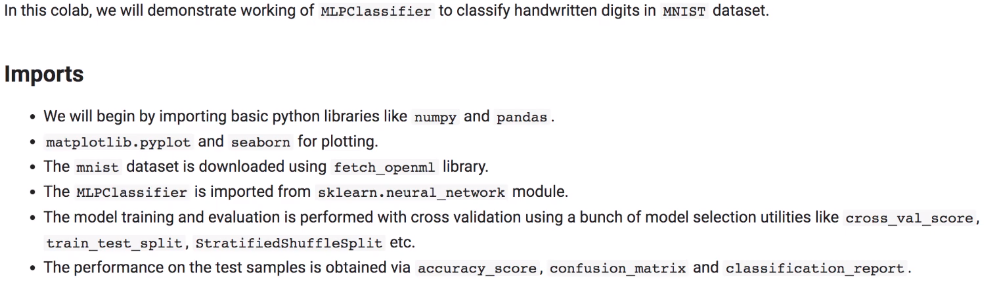

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

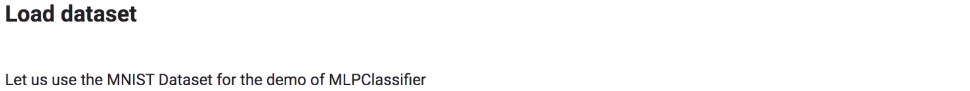

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalize
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

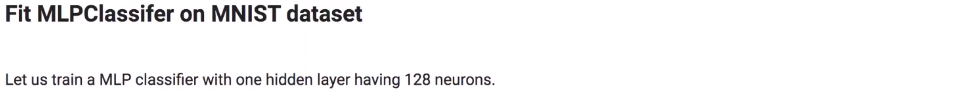

In [7]:
mlpc = MLPClassifier(hidden_layer_sizes=(128, ))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [8]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(), cv=cv)
print('Trainning Accuracy: {:.2f} %'.format(cv_score.mean()*100))

Trainning Accuracy: 97.74 %


In [9]:
# prediction probabilities of test data
mlpc.predict_proba(X_test[:5])

array([[3.05593667e-14, 1.37233398e-16, 1.08582458e-11, 9.07333730e-07,
        9.96136090e-19, 7.97367572e-15, 5.04303024e-20, 9.99999089e-01,
        5.87927538e-12, 3.17906587e-09],
       [3.91494524e-14, 4.90091784e-11, 1.00000000e+00, 1.63112015e-10,
        2.47848798e-29, 4.52294337e-14, 1.31538430e-13, 9.01327561e-24,
        1.62784814e-12, 2.45978161e-23],
       [1.29367723e-11, 9.99990728e-01, 1.28428289e-06, 1.06734006e-10,
        2.75248029e-08, 2.35504628e-09, 2.20073436e-08, 7.16983859e-07,
        7.21875930e-06, 9.38168144e-12],
       [1.00000000e+00, 2.85178690e-20, 6.57951542e-12, 7.63942448e-21,
        5.08558785e-19, 3.10543093e-17, 5.10634995e-11, 1.87254430e-12,
        1.36678303e-21, 1.28750456e-13],
       [3.43861080e-13, 9.89474819e-20, 6.75092286e-14, 5.48048856e-19,
        9.99994137e-01, 3.50358618e-17, 2.96653568e-14, 1.03954733e-11,
        2.96363875e-13, 5.86291976e-06]])

In [10]:
y_pred = mlpc.predict(X_test)

In [11]:
print('Train accuracy: {:.2f} %'.format(accuracy_score(y_train, mlpc.predict(X_train))*100))
print('Test accuracy: {:.2f} %'.format(accuracy_score(y_test, mlpc.predict(X_test))*100))

Train accuracy: 100.00 %
Test accuracy: 97.98 %


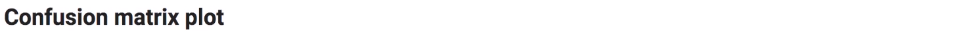

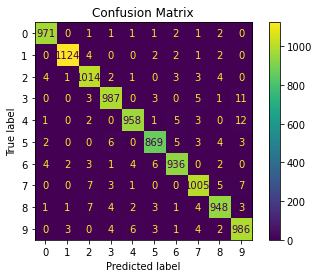

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [13]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



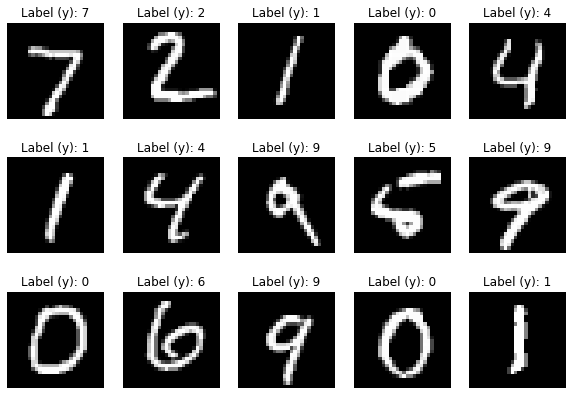

In [14]:
# Plotting some test samples

fig = plt.figure(figsize=(10, 7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

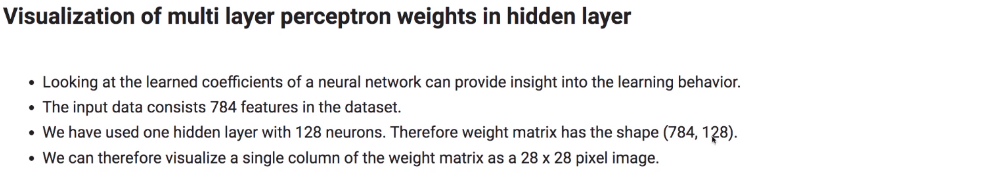

In [15]:
w = mlpc.coefs_
w = np.array(w[0])
w.shape

(784, 128)

In [16]:
w1 = np.array(w[:, 0])
w1.shape

(784,)

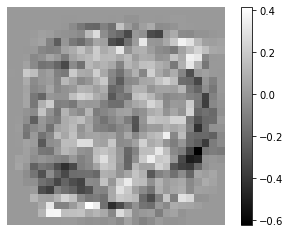

In [17]:
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt.imshow(w_matrix, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

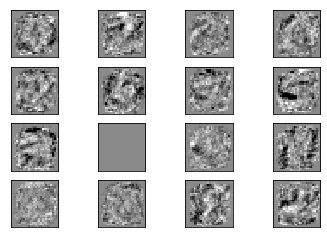

In [18]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()    

Text(0.5, 1.0, 'Loss curve')

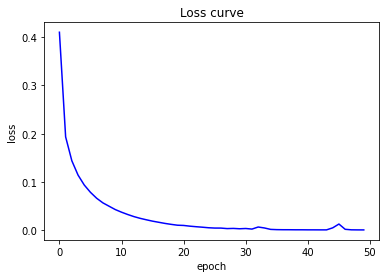

In [19]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

In [21]:
mlpc.out_activation_

'softmax'